# Análise Exploratória em Conjunto de Dados do TCE-RS

# Análise 1

# Business Understanding

    - Quais são os principais bens materiais comprados pelos órgãos públicos do Rio Grande do Sul?
    - É possível identificar algum padrão nas compras? Seja por época do ano ou por tipo de órgão comprador? 
    - O que mais é possível descobrir sobre as licitações do estado?
    - Manual disponível em: https://portalnovo.tce.rs.gov.br/repo/cex/licitacon/eValidador-licitacon-manual-layout-1.4.pdf

## Data Understanding (licitacoes.csv)

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from IPython.display import display
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# Gerar output consolidado na pasta raiz como série temporal (2016-2019; reutilizado na Analise_3_TCE-RS)
year = [2016, 2017, 2018, 2019]
cols = ['NR_LICITACAO', 'ANO_LICITACAO', 'DT_HOMOLOGACAO', 'CD_TIPO_MODALIDADE', 'VL_LICITACAO', 'DS_OBJETO', 'TP_OBJETO', 'NM_ORGAO']
consolidated = pd.DataFrame()

if not os.path.exists('licitacoes.csv'):
    for y in year:
        path = r'C:\Users\casoto\Desktop\TCE-RS\\' + str(y) + '\\licitacao.csv'
        df = pd.read_csv(path, usecols = cols)
        consolidated = pd.concat([df, consolidated])
    consolidated.to_csv('licitacoes.csv')

In [3]:
# Verificando bases disponíveis
path = r'C:\Users\casoto\Desktop\TCE-RS'
os.listdir(path)

['.ipynb_checkpoints',
 '2016',
 '2016.csv.zip',
 '2017',
 '2017.csv.zip',
 '2018',
 '2018.csv.zip',
 '2019',
 '2019.csv.zip',
 'Analise_1_TCE-RS.ipynb',
 'Analise_2_TCE-RS.ipynb',
 'Analise_3_TCE-RS.ipynb',
 'Descrição do Teste - Data Scientist_1.pdf',
 'itens.csv',
 'licitacoes.csv']

In [4]:
# Analisando arquivo licitacoes.csv
licitacao = pd.read_csv(path + '\\licitacoes.csv')
pd.options.display.max_columns = None # Mostrar todas as colunas
licitacao.drop(columns = 'Unnamed: 0', inplace = True)
licitacao.head()

,NM_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,TP_OBJETO,DS_OBJETO,VL_LICITACAO,DT_HOMOLOGACAO
0,PM DE NOVA PALMA,3.0,2019,TMP,CSE,CONTRATAÇÃO GLOBAL DE EMPRESA PARA CONSTRUÇÃO ...,276405.12,2019-10-11
1,PM DE NOVA PALMA,1.0,2019,TMP,OSE,"Reforma da UBS do Distrito da Vila Cruz, pintu...",75396.00,2019-04-29
2,CIA. ÁGUAS TERMAIS MARCELINO RAMOS - TERMASA,3.0,2019,EST,PER,Constitui objeto da presente Licitação a explo...,105612.48,2019-08-14
3,PM DE ESPERANÇA DO SUL,34.0,2019,CNV,OUS,Contratação de serviços de arbitragem para atu...,10600.00,2019-05-07
4,PM DE BOA VISTA DO SUL,3.0,2019,PRP,OUS,Contratação de empresa para prestação de servi...,430770.00,2019-01-28


In [5]:
# Avaliação das colunas relevantes (chaves vide manual)
"""
    NM_ORGAO: Nome do orgão
    ANO_LICITACAO: Ano da licitação (outras referencias de data nas colunas DT_ABERTURA, DT_HOMOLOGACAO, DT_ADJUDICACAO)
    VL_LICITACAO: Valor da licitação
    DS_OBJETO: Descrição do objeto
    TP_OBJETO: Tipo de objeto
"""
licitacao.loc[:,['NR_LICITACAO', 'ANO_LICITACAO', 'CD_TIPO_MODALIDADE', 'VL_LICITACAO', 'DS_OBJETO', 'TP_OBJETO', 'NM_ORGAO']].head()

,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,VL_LICITACAO,DS_OBJETO,TP_OBJETO,NM_ORGAO
0,3.0,2019,TMP,276405.12,CONTRATAÇÃO GLOBAL DE EMPRESA PARA CONSTRUÇÃO ...,CSE,PM DE NOVA PALMA
1,1.0,2019,TMP,75396.00,"Reforma da UBS do Distrito da Vila Cruz, pintu...",OSE,PM DE NOVA PALMA
2,3.0,2019,EST,105612.48,Constitui objeto da presente Licitação a explo...,PER,CIA. ÁGUAS TERMAIS MARCELINO RAMOS - TERMASA
3,34.0,2019,CNV,10600.00,Contratação de serviços de arbitragem para atu...,OUS,PM DE ESPERANÇA DO SUL
4,3.0,2019,PRP,430770.00,Contratação de empresa para prestação de servi...,OUS,PM DE BOA VISTA DO SUL


## Data Cleaning

In [6]:
# Tamanho da base licitacao.csv (linhas, colunas)
licitacao.shape

(237011, 8)

In [7]:
# Identificando registros em branco/nulos nas colunas-chave definidas
licitacao.loc[:,['NR_LICITACAO', 'ANO_LICITACAO', 'CD_TIPO_MODALIDADE', 'VL_LICITACAO', 'DS_OBJETO', 'TP_OBJETO', 'NM_ORGAO']].isnull().sum()

NR_LICITACAO             0
ANO_LICITACAO            0
CD_TIPO_MODALIDADE       0
VL_LICITACAO          9189
DS_OBJETO                0
TP_OBJETO                0
NM_ORGAO                 0
dtype: int64

    No manual são identificadas três chaves para o arquivo em questão (pag. 21), sendo elas:
        - NR_LICITACAO
        - ANO_LICITACAO
        - CD_TIPO_MODALIDADE
    No entanto, existem campos obrigatórios (ex.: VL_LICITACAO) que estão categorizados como obrigatórios (pag. 25) mas não foram preenchidos.
    Nestes casos, os valores em branco serão desconsiderados das análises quantitativas.
    A mesma tratativa foi aplicada aos dados com valor zerado (coluna VL_LICITACAO).

In [8]:
# Remoção de linhas NaN
licitacao.dropna(subset = ['VL_LICITACAO'], inplace = True)
licitacao.shape

(227822, 8)

In [9]:
# Verificando registros de licitações com valor zero (VL_LICITACAO)
gpby_zeros = licitacao.loc[licitacao['VL_LICITACAO'] == 0][['NM_ORGAO', 'DS_OBJETO', 'VL_LICITACAO']]
gpby_zeros = gpby_zeros.groupby('DS_OBJETO').count().sort_values(by = 'VL_LICITACAO', ascending = False)
gpby_zeros.head(10)

,NM_ORGAO,VL_LICITACAO
DS_OBJETO,,
Material,153,153
...,64,64
Contratacao de Servico,28,28
AQUISIÇÃO DE MEDICAMENTOS,19,19
AQUISIÇÃO DE MERENDA ESCOLAR,17,17
AQUISICAO,13,13
AQUISIÇÃO DE TUBOS DE CONCRETO,11,11
Material permanente,11,11
Aquisição de gêneros alimentícios para a merenda escolar.,9,9


        De acordo com a documentação fornecida, o campo 'VL_LICITACAO' é obrigatório, no entanto existem + 12 mil registros cujo valor atribuído foi igual a zero (majoritariamente contratações de empresas, aquisição de serviços/materiais ou descrições incompletas).

In [10]:
# Removendo registros de licitacoes com valor zero (VL_LICITACAO)
licitacao.drop(licitacao.loc[licitacao['VL_LICITACAO'] == 0].index, inplace = True)
licitacao.shape

(215620, 8)

# Data Exploration

## Quantidade de Registros por Tipo de Objeto

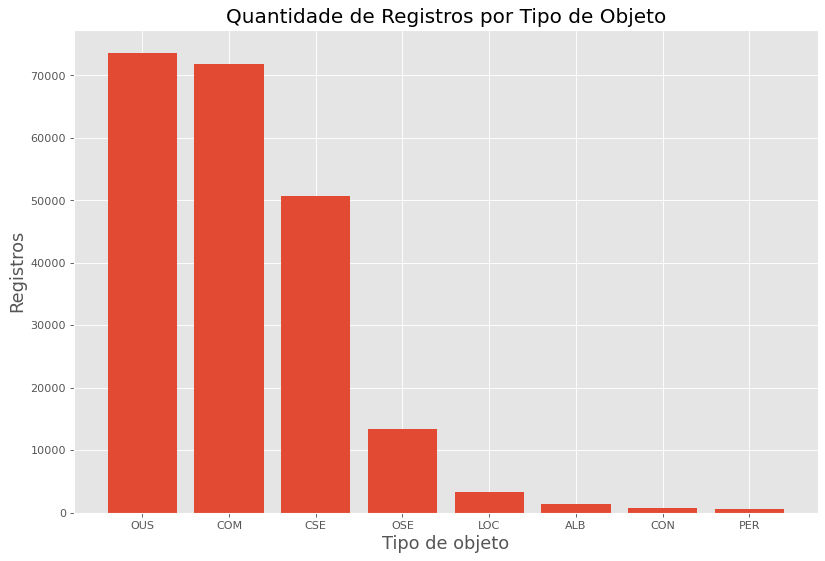

In [11]:
# Identificando tipo de objeto com maior representatividade

figure(figsize=(12, 8), dpi=80) # Alterar escala
labels = licitacao['TP_OBJETO'].value_counts().index

plt.bar(labels, licitacao['TP_OBJETO'].value_counts())
plt.title('Quantidade de Registros por Tipo de Objeto', fontsize = 18)
plt.xlabel('Tipo de objeto', fontsize = 16)
plt.ylabel('Registros', fontsize = 16)
plt.show()

        No gráfico acima, fica evidente que a distribuição dos tipos de objetos licitatórios entre 2016-2019 têm maior representatividade entre os tipos OUS (Obras e Serviços de Engenharia), COM (Compras de materiais) e CSE (Compras e outros serviços), vide manual (pág. 28).

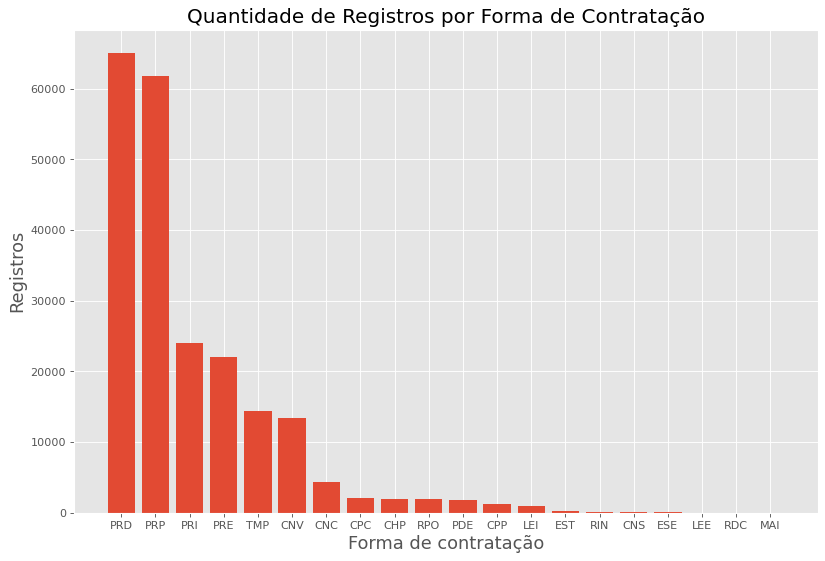

In [12]:
# Identificando tipos de contratação com maior representatividade (Compras/COM)

figure(figsize=(12, 8), dpi=80) # Alterar escala
labels = licitacao['CD_TIPO_MODALIDADE'].value_counts().index

plt.bar(labels, licitacao['CD_TIPO_MODALIDADE'].value_counts())
plt.title('Quantidade de Registros por Forma de Contratação', fontsize = 18)
plt.xlabel('Forma de contratação', fontsize = 16)
plt.ylabel('Registros', fontsize = 16)
plt.show()

        Avaliando as formas de contratação com maior quantidade de licitações registradas no sistema. Esta informação será relevante na análise três, pois usaremos a forma de contratação PRD (processo de dispensa) como exemplo para análise no acompanhamento mensal em Analise_3_TCE-RS.

## Valor Total em Licitações por Categoria

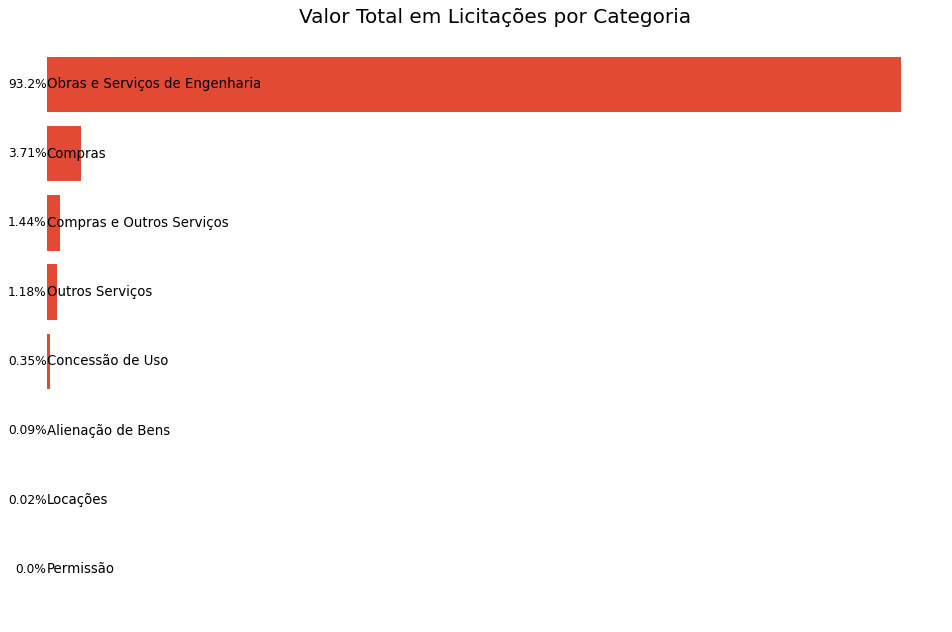

In [13]:
# Avaliando maiores gastos por categoria (TP_OBJETO)
"""
    Valores (pag. 28): ALB(Alienação de Bens), COM(Compras), CON(Concessão de Uso),
    CSE(Compras e Outros Serviços), LOC(Locações), OSE(Obras e Serviços de
    Engenharia), OUS(Outros Serviços), PER(Permissão), COL(Concessão Lei 8.987),
    PPP(Parceria Público-Privada) e PRI(Privatização).
"""

figure(figsize=(12, 8), dpi=80) # Alterar escala
labels_dict = {'ALB':'Alienação de Bens', 'COM':'Compras', 'CON':'Concessão de Uso', \
               'CSE':'Compras e Outros Serviços', 'LOC':'Locações', 'OSE':'Obras e Serviços de Engenharia', \
               'OUS':'Outros Serviços', 'PER':'Permissão', 'COL':'Concessão Lei 8.987', \
               'PPP':'Parceria Público-Privada', 'PRI':'Privatização'}

# Preparando base para plot
gpby_tp_objeto = licitacao.loc[:, ['TP_OBJETO', 'VL_LICITACAO']].groupby(['TP_OBJETO']).sum()
gpby_tp_objeto.sort_values(by = ['VL_LICITACAO'], ascending = True, inplace = True)
gpby_tp_objeto['TP_OBJETO_DESC'] = 0
gpby_tp_objeto['TP_OBJETO_DESC'] = gpby_tp_objeto.index.map(labels_dict) # Mapear descrição a partir de um dicionario
total = gpby_tp_objeto['VL_LICITACAO'].sum() # Calculando valor total
gpby_tp_objeto['SHAREOF'] = round((gpby_tp_objeto['VL_LICITACAO'] / total) * 100, 2) # Shareof (fatia / total * 100)
gpby_tp_objeto

# Criando grafico de barras horizontais
labels = gpby_tp_objeto.index
plt.barh(labels, gpby_tp_objeto['VL_LICITACAO'])
plt.title('Valor Total em Licitações por Categoria', fontsize = 18)
for i, (p, pr) in enumerate(zip(gpby_tp_objeto['TP_OBJETO_DESC'], gpby_tp_objeto['SHAREOF'])): # Legendas com shareof
    plt.text(s=p, x=1, y=i, color="k", verticalalignment="center",horizontalalignment="left", size=12)
    plt.text(s=str(pr)+"%", x=pr-5, y=i, color="k",
             verticalalignment="center", horizontalalignment="right", size=11)
plt.axis("off")
plt.tight_layout()

        Neste gráfico, trouxe uma visão complementar ao gráfico 'Quantidade de Registros por Tipo de Objeto', porém avaliando a representatividade dos valores totais das licitações por categoria, sendo que por mais que a distribuição no primeiro gráfico seja mais bem distribúida entre Obras e Compras, o valor acumulado das licitações é majoritariamente concentrado em Obras e Serviços de Engenharia (93.2%).

## Distribuição de Valores de Licitação

Text(0.5, 1.0, 'Distribuição de Valores de Licitação')

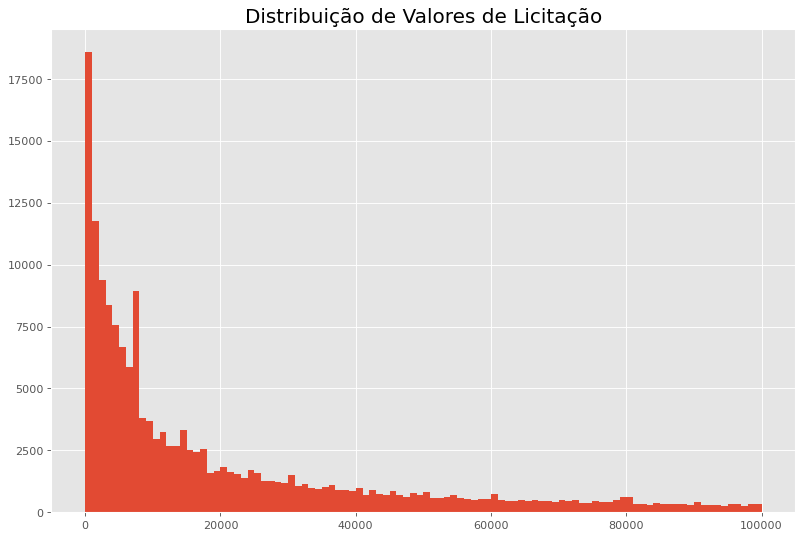

In [14]:
# Criando histograma com a coluna VL_LICITACAO

figure(figsize=(12, 8), dpi=80) # Alterar escala

plt.hist(licitacao['VL_LICITACAO'].loc[(licitacao['VL_LICITACAO']  < 100000)], bins = 100)
plt.title('Distribuição de Valores de Licitação', fontsize = 18)

        No gráfico acima, podemos concluir que a de distribuição dos pedidos de licitação está em valores menores (principalmente com dois picos nas faixas entre 0-1000R$ e 7000-8000R$), distribuído como um modelo despenhadeiro (a frequência é menor conforme os valores dos pedidos aumentam).

## Top 10 Orgãos com Maiores Despesas em Licitações  

In [15]:
# Selecão de amostragem com apenas licitações categorizadas como Compras/COM
licitacao_sample = licitacao.loc[licitacao['TP_OBJETO'] == 'COM']
licitacao_sample.head()

,NM_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,TP_OBJETO,DS_OBJETO,VL_LICITACAO,DT_HOMOLOGACAO
5,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,79.0,2019,PRP,COM,Aquisição de 78.000 (setenta e oito mil) quilo...,406120.0,2019-11-05
6,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,10.0,2019,PRP,COM,"Aquisição de 3.700 kg de polímero não iônico, ...",92056.0,2019-02-26
7,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,7.0,2019,PRP,COM,Aquisição de 65 t (sessenta e cindo toneladas)...,533000.0,2019-02-11
8,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,38.0,2019,PRP,COM,Aquisição de 40.500 (quarenta mil e quinhentos...,359032.5,2019-06-06
9,SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL,68.0,2019,PRP,COM,Aquisição de Larvicida biológico BTI (Bacillus...,443133.2,2019-10-09


In [16]:
# Avaliando top 5 orgãos com maiores despesas em licitações
"""
    Avaliar quantidade de licitações:
        1. Agrupado por orgão;
        2. Ordenado por valor total acumulado e quantidade de licitações.
"""
gpby_nm_orgao = licitacao_sample.loc[:, ['NM_ORGAO', 'VL_LICITACAO']].groupby(['NM_ORGAO']).sum()
gpby_nm_orgao['QUANTIDADE'] = licitacao_sample.loc[:, ['NM_ORGAO', 'VL_LICITACAO']].groupby(['NM_ORGAO']).count()
gpby_nm_orgao.sort_values(by = ['VL_LICITACAO', 'QUANTIDADE'], inplace = True, ascending = False)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Remover notação científica do DataFrame
total = gpby_nm_orgao['VL_LICITACAO'].sum() 
gpby_nm_orgao['SHAREOF'] = round((gpby_nm_orgao['VL_LICITACAO'] / total) * 100, 2) # Shareof (fatia / total * 100)

gpby_nm_orgao = gpby_nm_orgao[:5]
print('Os dez orgãos com maior representatividade em licitacões compõem ', str(round(gpby_nm_orgao['SHAREOF'].sum(),2)) + '%', 'do valor total das licitacões registradas.')
gpby_nm_orgao

Os dez orgãos com maior representatividade em licitacões compõem  77.74% do valor total das licitacões registradas.


,VL_LICITACAO,QUANTIDADE,SHAREOF
NM_ORGAO,,,
PM DE PASSO DO SOBRADO,46022067187.01,31,48.22
PM DE SANTA MARGARIDA DO SUL,15806172103.88,161,16.56
CONS. PÚBL. DA ASSOC. DOS MUNIC. DA REGIÃO METR. DE POA - CP GRANPAL,7024258640.87,13,7.36
CONS. PÚBL. DO EXTREMO SUL,3499853024.92,25,3.67
PM DE ITATI,1841024793.29,273,1.93


## Scatter Plot + Histogramas de Distribuição Consolidados

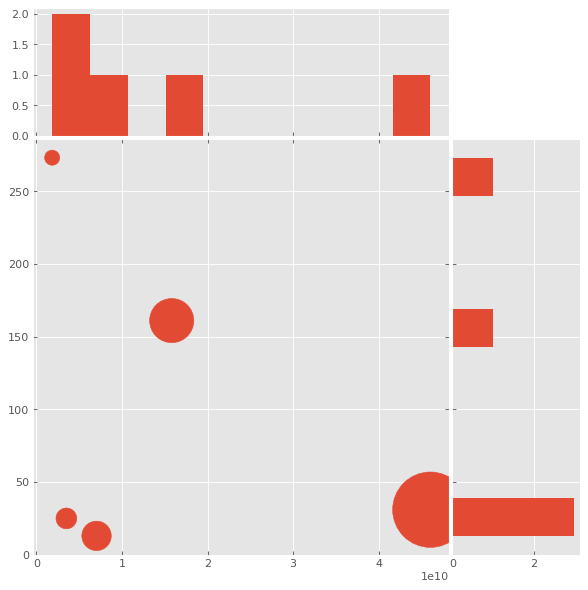

In [17]:
# Criando scatter plot com volumetria (outliers definidos com valores acima de 70 mil)

figure(figsize=(8, 8), dpi=80) # Alterar escala

# Eixos
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
binwidth = 0.25
spacing = 0.005
binwidth = 0.25

x = gpby_nm_orgao['VL_LICITACAO']
y = gpby_nm_orgao['QUANTIDADE']

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

ax_scatter.scatter(gpby_nm_orgao['VL_LICITACAO'], gpby_nm_orgao['QUANTIDADE'], s = (gpby_nm_orgao['VL_LICITACAO']) * 0.0000001)


lim = np.ceil(np.abs([x, y]).max() / binwidth) * binwidth

bins = 10
ax_histx.hist(x, bins = bins)
ax_histy.hist(y, bins = bins, orientation = 'horizontal')

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

plt.show()

        No gráfico em questão, fica evidente que existem poucos pedidos com maior concentração de valor (outliers, canto inferior direito) e muitas licitações com valores baixos (canto superior esquerdo). Os histogramas conjugados são apoio para a análise em questão, mostrando comportamentos isolados.

## Análise Multivariável

array([[<AxesSubplot:xlabel='VL_LICITACAO', ylabel='VL_LICITACAO'>,
        <AxesSubplot:xlabel='QUANTIDADE', ylabel='VL_LICITACAO'>,
        <AxesSubplot:xlabel='SHAREOF', ylabel='VL_LICITACAO'>],
       [<AxesSubplot:xlabel='VL_LICITACAO', ylabel='QUANTIDADE'>,
        <AxesSubplot:xlabel='QUANTIDADE', ylabel='QUANTIDADE'>,
        <AxesSubplot:xlabel='SHAREOF', ylabel='QUANTIDADE'>],
       [<AxesSubplot:xlabel='VL_LICITACAO', ylabel='SHAREOF'>,
        <AxesSubplot:xlabel='QUANTIDADE', ylabel='SHAREOF'>,
        <AxesSubplot:xlabel='SHAREOF', ylabel='SHAREOF'>]], dtype=object)

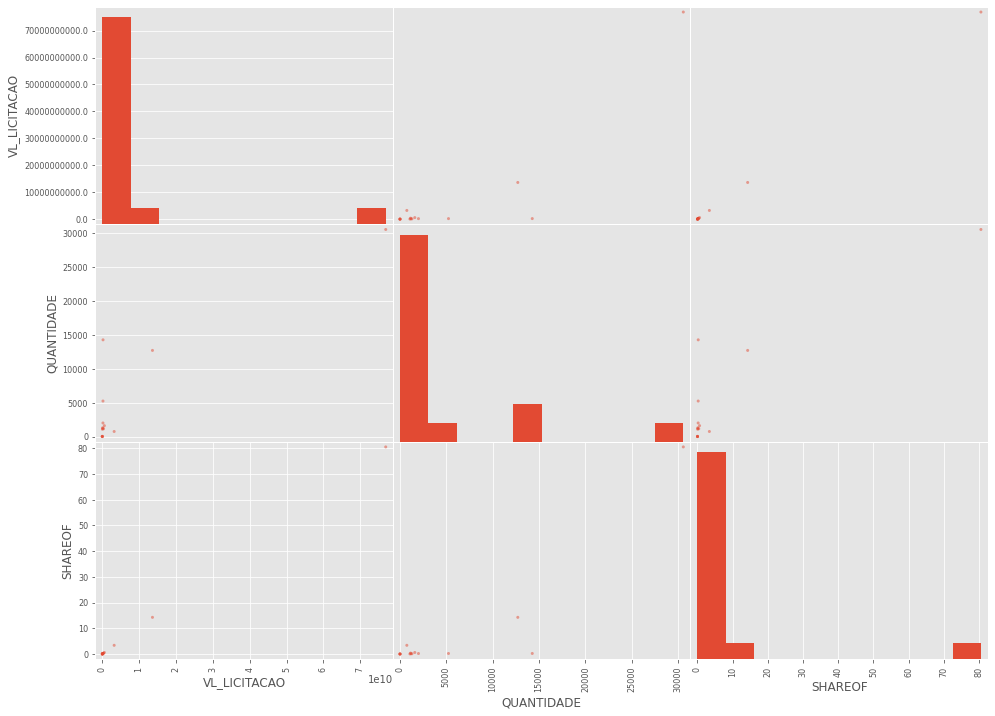

In [18]:
# Visualizacao alternativa para analise de multi-variaveis (valores totais de licitacao, quantidade de pedidos e shareof)
# Selecão de amostragem com apenas licitações categorizadas como Compras/COM
# licitacao_sample = licitacao_sample.loc[licitacao_sample['VL_LICITACAO'] <= 100000]

gpby_modalidade = licitacao_sample.loc[:, ['CD_TIPO_MODALIDADE', 'VL_LICITACAO']].groupby(['CD_TIPO_MODALIDADE']).sum()
gpby_modalidade['QUANTIDADE'] = licitacao_sample.loc[:, ['CD_TIPO_MODALIDADE', 'VL_LICITACAO']].groupby(['CD_TIPO_MODALIDADE']).count()
gpby_modalidade.sort_values(by = ['VL_LICITACAO', 'QUANTIDADE'], inplace = True, ascending = False)
total = gpby_modalidade['VL_LICITACAO'].sum() 
gpby_modalidade['SHAREOF'] = round((gpby_modalidade['VL_LICITACAO'] / total) * 100, 2) # Shareof (fatia / total * 100)
gpby_modalidade

pd.plotting.scatter_matrix(gpby_modalidade[gpby_modalidade.columns.tolist()], figsize=(16,12))

        Por fim, foi feita uma análise apêndice entre multi-variáveis para identificar possíveis outliers entre as variáveis de quantidade, valor de licitação e Shareof, mostrando que todas possuem um comportamento similar nos histogramas com evidências de outliers.

### Fim